In [1]:
# !pip install qiskit
# !pip install tqdm quspin
# !pip install pandas
# !pip install pylatexenc
# !pip install torch
# !pip install qiskit_algorithms

In [1]:
from qiskit import * #qiskit
from qiskit.visualization import plot_histogram #for plotting histogram
import numpy as np # for mathematical computation
import matplotlib.pyplot as plt #for plotting graph
#%matplotlib inline

from qiskit_aer import AerSimulator  # change this to Aer for C++ compiled code and the option to run on the GPU. Or use BasicAer for python providers
#from qiskit.algorithms import VQE

In [3]:
#from qiskit.opflow import MatrixOp
from qiskit.quantum_info import Operator, SparsePauliOp
from qiskit.circuit.library import EfficientSU2

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
from cmath import e
from cmath import pi
import cmath
import sympy as sym
from tqdm import tqdm

from scipy import sparse
from scipy.sparse import csr_matrix

from scipy.linalg import expm, logm

from scipy.linalg import eig, eigh
from scipy.sparse.linalg import eigs, eigsh

from scipy.optimize import minimize, Bounds

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
import quspin
import pandas as pd
from tqdm import tqdm
from scipy.integrate import quad
from scipy.optimize import curve_fit
import csv
import scipy.stats
from scipy.linalg import logm, expm

from quspin.operators import hamiltonian,exp_op
from quspin.basis import spinful_fermion_basis_general
from quspin.basis import spin_basis_1d
from quspin.basis import spinless_fermion_basis_1d
from quspin.basis import tensor_basis
from quspin.tools.measurements import ent_entropy

from matplotlib import rc


from quspin.tools.evolution import evolve
from quspin.tools.Floquet import Floquet_t_vec 
from six import iteritems 

import time

In [7]:
import qiskit
qiskit.__version__

'1.3.2'

# Hamiltonian

In [10]:
from scipy.sparse import identity
import scipy.sparse as sp
from scipy.linalg import expm, sqrtm, eigh, eigvalsh
from scipy.sparse.linalg import eigsh

def H_spin(m, a,g,L):
    hop_term=[[0.25/a, j, j+1] for j in range(L-1)]

    
    hop_mass=[[0.5*m*(-1)**(j+1), j] for j in range(L)]
    
    hop_zz_g=[[0.25*g/a, j, j+1] for j in range(L-1)]
    hop_z1_g=[[0.25*g/a, j] for j in range(L-1)]
    hop_z2_g=[[0.25*g/a, j+1] for j in range(L-1)]
    ID=[[0.25*(g/a),n] for n in range(L)]
        
    basis = spin_basis_1d(L)

    # Define Hamiltonian
    static = [["xx",hop_term],["yy",hop_term], ["z", hop_mass], ["zz",hop_zz_g],["z",hop_z1_g],["z",hop_z2_g], ["I",ID]]
    dynamic = []
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex128,
                    check_symm=False,check_herm=False,check_pcon=False)
    
    # Find ground state and its energy
    return H#+((g/a)*0.25*(L-1))*identity(2**L)

In [17]:
N = 8

a = 0.5
m = 1.0
g = 1.0

In [20]:
Ham = H_spin(m, a, g, N)

In [21]:
Ham

<quspin.operators.hamiltonian:
static mat: <Compressed Sparse Row sparse matrix of dtype 'complex128'
	with 1152 stored elements and shape (256, 256)>
dynamic:>

In [22]:
E,V=Ham.eigsh(k=5,which="SA")

In [23]:
E

array([-5.22343851, -4.59082327, -4.16472945, -3.72966916, -3.43818965])

In [25]:
qubitHam = Operator(Ham.toarray())

In [31]:
Ham_qiskit = SparsePauliOp.from_operator(qubitHam, atol=None, rtol=None)

In [33]:
Ham_qiskit

SparsePauliOp(['IIIIIIII', 'IIIIIIIZ', 'IIIIIIXX', 'IIIIIIYY', 'IIIIIIZI', 'IIIIIIZZ', 'IIIIIXXI', 'IIIIIYYI', 'IIIIIZII', 'IIIIIZZI', 'IIIIXXII', 'IIIIYYII', 'IIIIZIII', 'IIIIZZII', 'IIIXXIII', 'IIIYYIII', 'IIIZIIII', 'IIIZZIII', 'IIXXIIII', 'IIYYIIII', 'IIZIIIII', 'IIZZIIII', 'IXXIIIII', 'IYYIIIII', 'IZIIIIII', 'IZZIIIII', 'XXIIIIII', 'YYIIIIII', 'ZZIIIIII'],
              coeffs=[4. +0.j, 1. +0.j, 0.5+0.j, 0.5-0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5-0.j,
 1.5+0.j, 0.5+0.j, 0.5+0.j, 0.5-0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5-0.j,
 1.5+0.j, 0.5+0.j, 0.5+0.j, 0.5-0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5-0.j,
 1.5+0.j, 0.5+0.j, 0.5+0.j, 0.5-0.j, 0.5+0.j])

In [75]:
# ansatz = EfficientSU2(N, su2_gates=['ry'], entanglement="pairwise", reps=6)
ansatz = EfficientSU2(N, su2_gates=['ry'], entanglement="linear", reps=N+2)
#ansatz = EfficientSU2(N, su2_gates=['ry'], entanglement="full", reps=2)

#ansatz = EfficientSU2(N, su2_gates=['ry'], entanglement="pairwise", reps=4)

Depth:  36


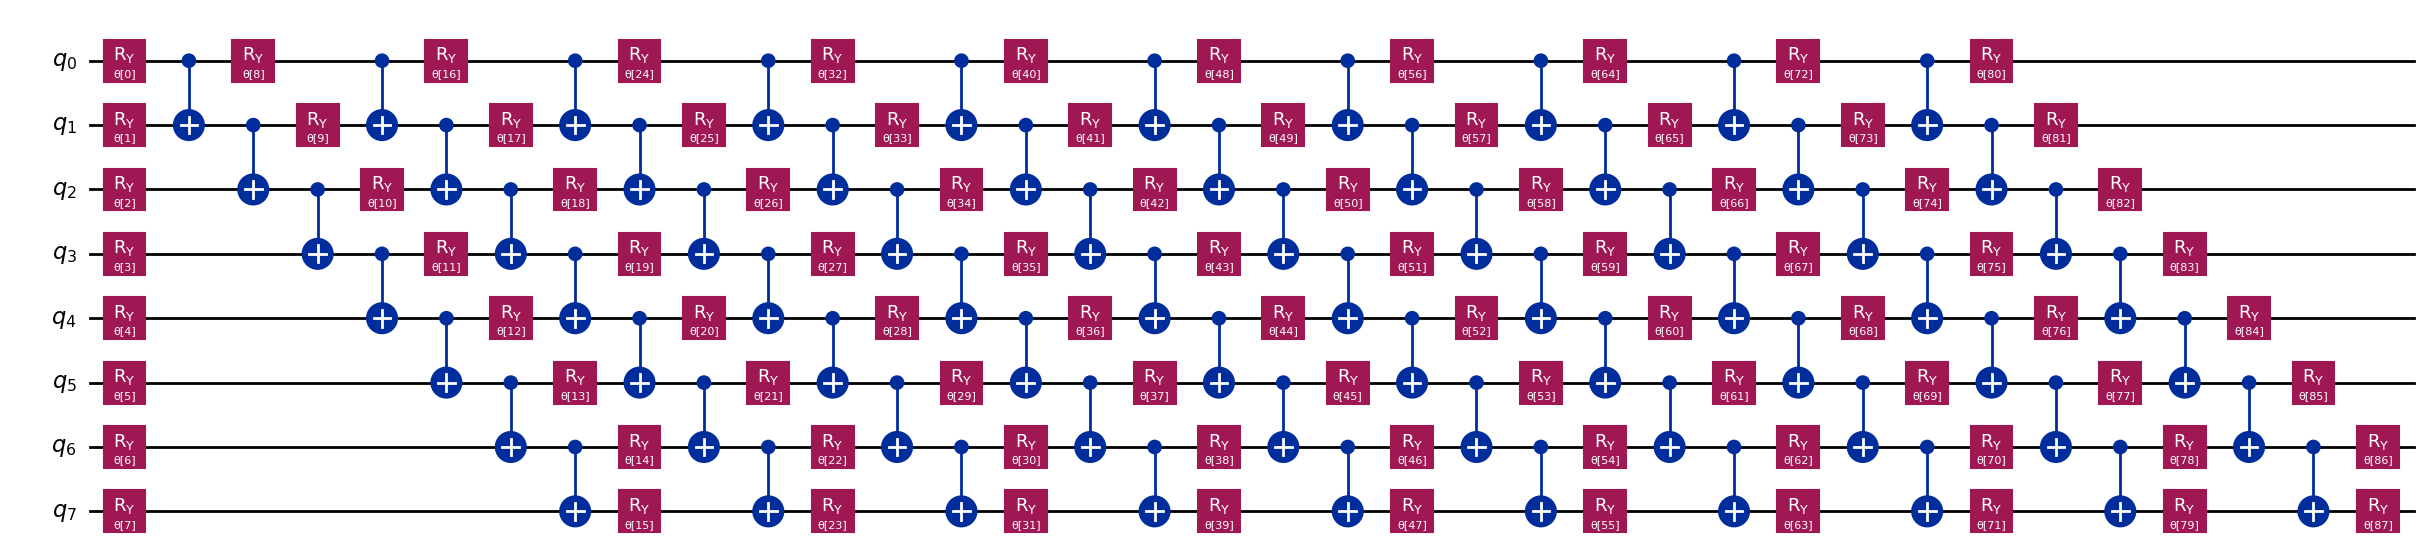

In [77]:
print('Depth: ', ansatz.decompose().depth())
ansatz.decompose().draw('mpl', fold=-1)

In [79]:
x0 = [np.pi/2] * ansatz.num_parameters

In [82]:
x0

[1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267

In [85]:
len(x0)

88

# Estimator V1

In [59]:
from qiskit.primitives import Estimator # Estimator V1
from qiskit_ibm_runtime import QiskitRuntimeService
#from qiskit import Aer, BasicAer, assemble
#from qiskit_ibm_runtime import Estimator

In [61]:
backend = AerSimulator()
estimator_v1 = Estimator()

C:\Users\yukwa\AppData\Local\Temp\ipykernel_5912\3976521138.py:2: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator_v1 = Estimator()


In [64]:
estimator_v1

In [66]:
def costFunctionE1(param, ansatz, Ham, params, expectations):
    params.append(param)
    start = time.time()
    job = estimator_v1.run([ansatz], [Ham], [param])
    result = job.result()
    exp = result.values[0]
    #print('run() time: ', time.time() - start)      
    expectations.append(exp)
    return exp

## COBYLA

In [25]:
params = []
expectations = []
maxiter = 1000

start_time = time.time()
result = minimize(costFunctionE1, x0, (ansatz, Ham_qiskit, params, expectations), method='COBYLA', options={'maxiter': maxiter}) # Success [2.71211263, 1.5909917 ]

print("--- minimize() running time: %s seconds ---\n" % (time.time() - start_time))
theta = result.x
print(result)
print(theta)
print(result.fun)

--- minimize() running time: 4.729320049285889 seconds ---

 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: -2.339137607989583
       x: [ 1.404e+00  2.860e+00 ...  1.532e+00  1.442e+00]
    nfev: 1000
   maxcv: 0.0
[1.40397379 2.86039287 2.29775574 1.2302518  0.28255009 1.26225878
 1.10569241 3.21062693 3.22521422 1.87578961 1.40378287 1.93021603
 1.98728993 2.61195008 1.43721922 1.45712013 0.40199653 2.68300166
 1.53179352 1.44205709]
-2.339137607989583


In [26]:
E

array([-2.34152542, -1.40211303, -0.6755705 ,  0.33600419,  0.5       ])

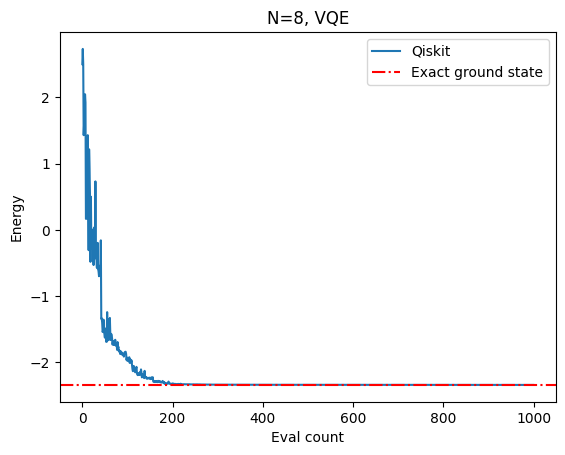

In [27]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

#pylab.rcParams["figure.figsize"] = (12, 8)

#steps_np = np.asarray(steps)
#counts_np = np.asarray(counts)
#values_np = np.asarray(values)

#pylab.plot(range(maxiter),expectations[:maxiter], label=f"Qiskit VQE state")
pylab.plot(range(len(expectations)),expectations, label=f"Qiskit")
plt.axhline(y=E[0], color='r', linestyle='-.', label=f"Exact ground state")

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
#pylab.title("Energy convergence for each computed state")
plt.title('N=8, VQE')
pylab.legend(loc="upper right")

## Adam

In [28]:
from qiskit_algorithms.gradients import ParamShiftEstimatorGradient
from qiskit.primitives import Estimator
import torch
import numpy as np
import time

# Initialize estimator and gradient
estimator = Estimator()
gradient = ParamShiftEstimatorGradient(estimator)

params = torch.tensor(x0, dtype=torch.float64, requires_grad=True)
optimizer = torch.optim.Adam([params], lr=0.01)

maxiter = 1000
expectations = []

start_time = time.time()
for i in range(maxiter):
    optimizer.zero_grad()
    
    # Convert torch params to numpy for qiskit
    param_np = params.detach().numpy()

    # Compute expectation value (loss)
    job = estimator.run([ansatz], [Ham_qiskit], [param_np])
    expval = job.result().values[0]

    # Compute gradient via parameter-shift rule
    grad_job = gradient.run([ansatz], [Ham_qiskit], [param_np])
    grad_result = grad_job.result().gradients[0]

    # Manually set gradient for params
    params.grad = torch.tensor(grad_result, dtype=torch.float64)

    # Perform optimization step
    optimizer.step()
    
    expectations.append(expval)
    
    if (i + 1) % 50 == 0:
        print(f'Iteration {i+1}/{maxiter}, Cost: {expval}')

print("--- Adam optimizer running time: %s seconds ---\n" % (time.time() - start_time))

optimized_theta = params.detach().numpy()
print("Optimized Parameters (theta):", optimized_theta)
print("Final minimized cost:", expectations[-1])

/tmp/ipykernel_629761/365748969.py:8: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


Iteration 50/1000, Cost: -0.7504775113755207
Iteration 100/1000, Cost: -1.400798458369426
Iteration 150/1000, Cost: -1.7745225199443122
Iteration 200/1000, Cost: -1.9742062689342954
Iteration 250/1000, Cost: -2.1062507070545062
Iteration 300/1000, Cost: -2.1963119332185794
Iteration 350/1000, Cost: -2.2781716915525285
Iteration 400/1000, Cost: -2.3289085014460857
Iteration 450/1000, Cost: -2.339452499432582
Iteration 500/1000, Cost: -2.3411460910414306
Iteration 550/1000, Cost: -2.3414573223277797
Iteration 600/1000, Cost: -2.3415135779593226
Iteration 650/1000, Cost: -2.3415234801477394
Iteration 700/1000, Cost: -2.3415251277373255
Iteration 750/1000, Cost: -2.341525378822193
Iteration 800/1000, Cost: -2.341525413100256
Iteration 850/1000, Cost: -2.3415254172340108
Iteration 900/1000, Cost: -2.341525417670098
Iteration 950/1000, Cost: -2.341525417710012
Iteration 1000/1000, Cost: -2.3415254177131515
--- Adam optimizer running time: 151.3561565876007 seconds ---

Optimized Parameters (

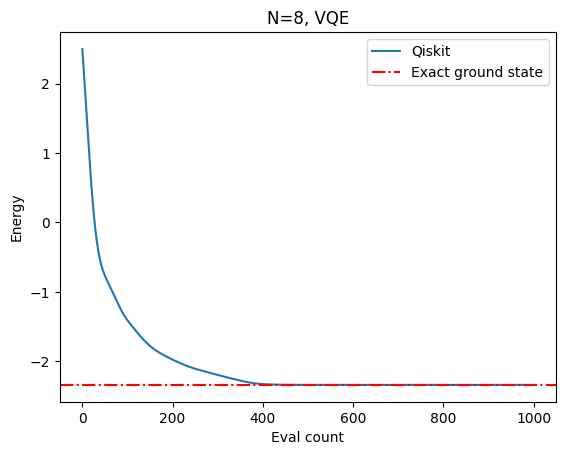

In [29]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

#pylab.rcParams["figure.figsize"] = (12, 8)

#steps_np = np.asarray(steps)
#counts_np = np.asarray(counts)
#values_np = np.asarray(values)

#pylab.plot(range(maxiter),expectations[:maxiter], label=f"Qiskit VQE state")
pylab.plot(range(len(expectations)),expectations, label=f"Qiskit")
plt.axhline(y=E[0], color='r', linestyle='-.', label=f"Exact ground state")

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
#pylab.title("Energy convergence for each computed state")
plt.title('N=8, VQE')
pylab.legend(loc="upper right")

## Stochastic Gradient Descent

In [30]:
from qiskit_algorithms.gradients import ParamShiftEstimatorGradient
from qiskit.primitives import Estimator
import torch
import numpy as np
import time

# Initialize estimator and gradient
estimator = Estimator()
gradient = ParamShiftEstimatorGradient(estimator)

params = torch.tensor(x0, dtype=torch.float64, requires_grad=True)
optimizer = torch.optim.SGD([params], lr=0.01)

maxiter = 1000
expectations = []

start_time = time.time()
for i in range(maxiter):
    optimizer.zero_grad()
    
    # Convert torch params to numpy for qiskit
    param_np = params.detach().numpy()

    # Compute expectation value (loss)
    job = estimator.run([ansatz], [Ham_qiskit], [param_np])
    expval = job.result().values[0]

    # Compute gradient via parameter-shift rule
    grad_job = gradient.run([ansatz], [Ham_qiskit], [param_np])
    grad_result = grad_job.result().gradients[0]

    # Manually set gradient for params
    params.grad = torch.tensor(grad_result, dtype=torch.float64)

    # Perform optimization step
    optimizer.step()
    
    expectations.append(expval)
    
    if (i + 1) % 50 == 0:
        print(f'Iteration {i+1}/{maxiter}, Cost: {expval}')

print("--- Adam optimizer running time: %s seconds ---\n" % (time.time() - start_time))

optimized_theta = params.detach().numpy()
print("Optimized Parameters (theta):", optimized_theta)
print("Final minimized cost:", expectations[-1])

/tmp/ipykernel_629761/681752068.py:8: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


Iteration 50/1000, Cost: -0.7583642991345384
Iteration 100/1000, Cost: -1.6055525077024164
Iteration 150/1000, Cost: -1.9177938455298078
Iteration 200/1000, Cost: -2.032353914490453
Iteration 250/1000, Cost: -2.081895807683999
Iteration 300/1000, Cost: -2.1118406183318488
Iteration 350/1000, Cost: -2.1353357571803415
Iteration 400/1000, Cost: -2.155996273180593
Iteration 450/1000, Cost: -2.174732869657705
Iteration 500/1000, Cost: -2.1917283591855505
Iteration 550/1000, Cost: -2.20701829928729
Iteration 600/1000, Cost: -2.2206563011729124
Iteration 650/1000, Cost: -2.232746812316489
Iteration 700/1000, Cost: -2.2434342941464007
Iteration 750/1000, Cost: -2.2528809239240633
Iteration 800/1000, Cost: -2.2612461124360386
Iteration 850/1000, Cost: -2.268673061689074
Iteration 900/1000, Cost: -2.275283050245566
Iteration 950/1000, Cost: -2.2811756350681827
Iteration 1000/1000, Cost: -2.2864321470519466
--- Adam optimizer running time: 144.3700511455536 seconds ---

Optimized Parameters (the

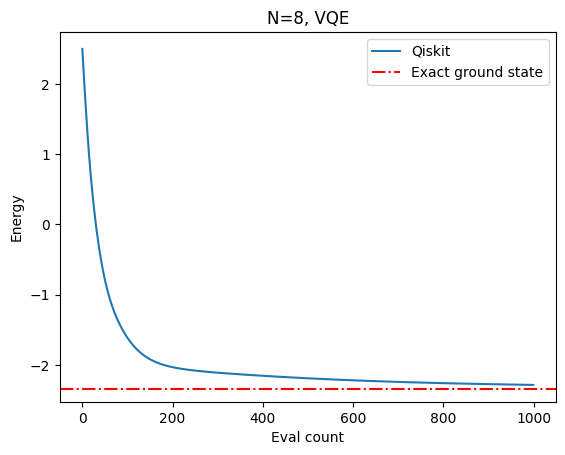

In [31]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

#pylab.rcParams["figure.figsize"] = (12, 8)

#steps_np = np.asarray(steps)
#counts_np = np.asarray(counts)
#values_np = np.asarray(values)

#pylab.plot(range(maxiter),expectations[:maxiter], label=f"Qiskit VQE state")
pylab.plot(range(len(expectations)),expectations, label=f"Qiskit")
plt.axhline(y=E[0], color='r', linestyle='-.', label=f"Exact ground state")

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
#pylab.title("Energy convergence for each computed state")
plt.title('N=8, VQE')
pylab.legend(loc="upper right")

## RMSprop

In [88]:
from qiskit_algorithms.gradients import ParamShiftEstimatorGradient
from qiskit.primitives import Estimator
import torch
import numpy as np
import time

# Initialize estimator and gradient
estimator = Estimator()
gradient = ParamShiftEstimatorGradient(estimator)

params = torch.tensor(x0, dtype=torch.float64, requires_grad=True)
optimizer = torch.optim.RMSprop([params], lr=0.01)

maxiter = 1000
expectations = []

start_time = time.time()
for i in range(maxiter):
    optimizer.zero_grad()
    
    # Convert torch params to numpy for qiskit
    param_np = params.detach().numpy()

    # Compute expectation value (loss)
    job = estimator.run([ansatz], [Ham_qiskit], [param_np])
    expval = job.result().values[0]

    # Compute gradient via parameter-shift rule
    grad_job = gradient.run([ansatz], [Ham_qiskit], [param_np])
    grad_result = grad_job.result().gradients[0]

    # Manually set gradient for params
    params.grad = torch.tensor(grad_result, dtype=torch.float64)

    # Perform optimization step
    optimizer.step()
    
    expectations.append(expval)
    
    if (i + 1) % 50 == 0:
        print(f'Iteration {i+1}/{maxiter}, Cost: {expval}')

print("--- RMSprop optimizer running time: %s seconds ---\n" % (time.time() - start_time))

optimized_theta = params.detach().numpy()
print("Optimized Parameters (theta):", optimized_theta)
print("Final minimized cost:", expectations[-1])

C:\Users\yukwa\AppData\Local\Temp\ipykernel_5912\406232754.py:8: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


Iteration 50/1000, Cost: -5.021358531223932
Iteration 100/1000, Cost: -5.189722419755156
Iteration 150/1000, Cost: -5.20226475978343
Iteration 200/1000, Cost: -5.205164746163918
Iteration 250/1000, Cost: -5.199540922879794
Iteration 300/1000, Cost: -5.205069094783564
Iteration 350/1000, Cost: -5.206974158841148
Iteration 400/1000, Cost: -5.200094915434602
Iteration 450/1000, Cost: -5.195762878398602
Iteration 500/1000, Cost: -5.190419010347225
Iteration 550/1000, Cost: -5.200763974134085
Iteration 600/1000, Cost: -5.203502370313433
Iteration 650/1000, Cost: -5.2009019525263405
Iteration 700/1000, Cost: -5.2055078582094465
Iteration 750/1000, Cost: -5.201597349402585
Iteration 800/1000, Cost: -5.1949122633002105
Iteration 850/1000, Cost: -5.20262539267506
Iteration 900/1000, Cost: -5.202535384723014
Iteration 950/1000, Cost: -5.195372285948437
Iteration 1000/1000, Cost: -5.204132118550501
--- RMSprop optimizer running time: 1711.9413118362427 seconds ---

Optimized Parameters (theta): [

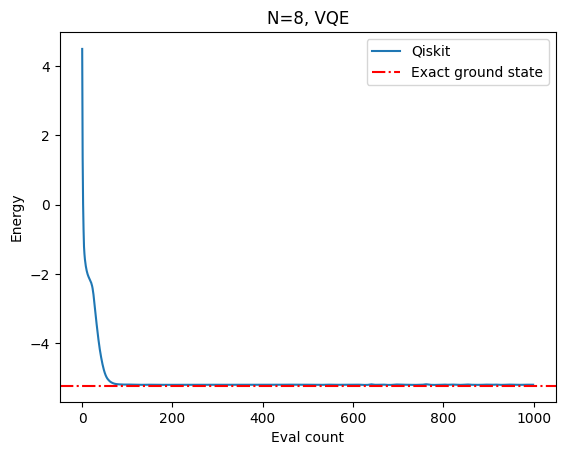

In [70]:
plt.plot(range(len(expectations)),expectations, label=f"Qiskit")
plt.axhline(y=E[0], color='r', linestyle='-.', label=f"Exact ground state")

plt.xlabel("Eval count")
plt.ylabel("Energy")
#plt.title("Energy convergence for each computed state")
plt.title('N=8, VQE')
plt.legend(loc="upper right")

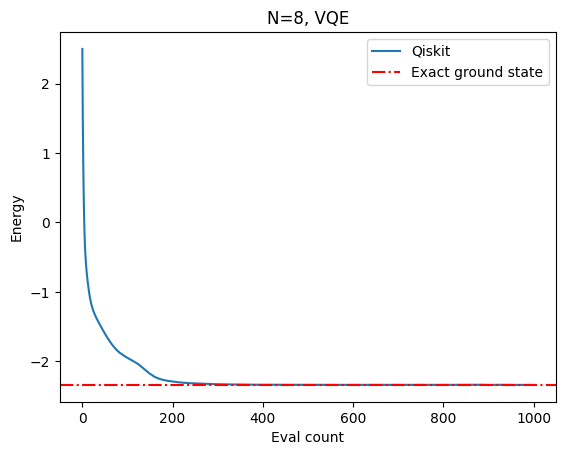

In [33]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

#pylab.rcParams["figure.figsize"] = (12, 8)

#steps_np = np.asarray(steps)
#counts_np = np.asarray(counts)
#values_np = np.asarray(values)

#pylab.plot(range(maxiter),expectations[:maxiter], label=f"Qiskit VQE state")
pylab.plot(range(len(expectations)),expectations, label=f"Qiskit")
plt.axhline(y=E[0], color='r', linestyle='-.', label=f"Exact ground state")

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
#pylab.title("Energy convergence for each computed state")
plt.title('N=8, VQE')
pylab.legend(loc="upper right")

# Estimator V2

In [34]:
#from qiskit.primitives import Estimator # Estimator V1
from qiskit_ibm_runtime import QiskitRuntimeService

from qiskit_aer import AerSimulator
#from qiskit_aer.primitives import SamplerV2 as Sampler_aer
#from qiskit_aer.primitives import EstimatorV2 as Estimator_aer
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager


In [35]:
backend = AerSimulator()
estimator_v2 = Estimator(backend)
estimator_v2.options.default_shots = 50000

In [36]:
estimator_v2

In [37]:
def costFunctionE2(param, ansatz, Ham, params, expectations):

    #estimator = Estimator()
    
    params.append(param)
    
    start = time.time()

    pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
    isa_circuit = pm.run(ansatz)
    isa_observable = Ham_qiskit.apply_layout(isa_circuit.layout)
    job = estimator_v2.run([(ansatz, Ham, param)])

    #job = estimator.run([(ansatz, Ham, param)])
    result = job.result()
    #print(result)
    exp = float(result[0].data.evs)
    
    #print('run() time: ', time.time() - start)
    
        

    expectations.append(exp)
    
    
    return exp

In [38]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(ansatz)
isa_observable = Ham_qiskit.apply_layout(isa_circuit.layout)
costFunctionE2(x0, isa_circuit, isa_observable, [], [])

2.4993199999999995

In [39]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(ansatz)
isa_observable = Ham_qiskit.apply_layout(isa_circuit.layout)
costFunctionE2(theta, isa_circuit, isa_observable, [], [])

-2.3459000000000003

In [40]:
x0 = [np.pi/2] * ansatz.num_parameters

In [41]:
x0 = theta

In [42]:
x0

array([1.40397379, 2.86039287, 2.29775574, 1.2302518 , 0.28255009,
       1.26225878, 1.10569241, 3.21062693, 3.22521422, 1.87578961,
       1.40378287, 1.93021603, 1.98728993, 2.61195008, 1.43721922,
       1.45712013, 0.40199653, 2.68300166, 1.53179352, 1.44205709])

## COBYLA

In [43]:
params = []
expectations = []
maxiter = 1000

start_time = time.time()

pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(ansatz)
isa_observable = Ham_qiskit.apply_layout(isa_circuit.layout)

result = minimize(costFunctionE2, x0, (isa_circuit, isa_observable, params, expectations), method='COBYLA', options={'maxiter': maxiter}, tol=1e-20) # Success [2.71211263, 1.5909917 ]
#, tol=1e-3

print("--- minimize() running time: %s seconds ---\n" % (time.time() - start_time))
theta = result.x
print(result)
print(theta)
print(result.fun)

--- minimize() running time: 2163.97469496727 seconds ---

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -2.3272
       x: [ 1.403e+00  2.861e+00 ...  1.510e+00  1.436e+00]
    nfev: 637
   maxcv: 0.0
[1.40326309 2.86092163 2.29610415 1.22715269 0.28405057 1.27082313
 1.11431183 3.20683814 3.22720923 1.89593874 1.42027337 1.99668889
 1.88656686 2.60870563 1.43462403 1.47547432 0.41482498 2.67177826
 1.51046113 1.43567615]
-2.3272


In [44]:
E

array([-2.34152542, -1.40211303, -0.6755705 ,  0.33600419,  0.5       ])

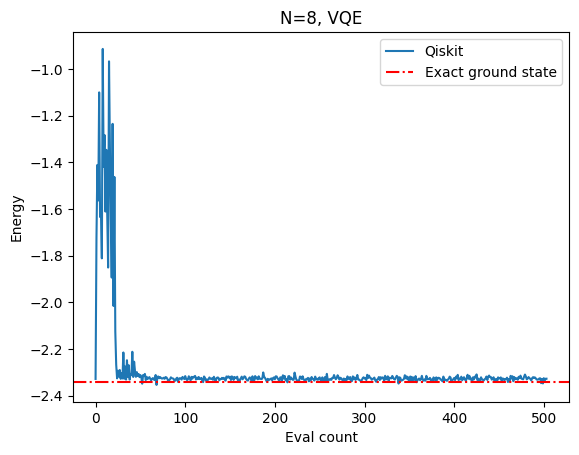

In [45]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

#pylab.rcParams["figure.figsize"] = (12, 8)

#steps_np = np.asarray(steps)
#counts_np = np.asarray(counts)
#values_np = np.asarray(values)

#pylab.plot(range(maxiter),expectations[:maxiter], label=f"Qiskit VQE state")
pylab.plot(range(len(expectations)),expectations, label=f"Qiskit")
plt.axhline(y=E[0], color='r', linestyle='-.', label=f"Exact ground state")

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
#pylab.title("Energy convergence for each computed state")
plt.title('N=8, VQE')
pylab.legend(loc="upper right")

In [46]:
print(time.ctime())

Tue Mar 11 02:03:01 2025


## Adam

In [47]:
import torch
import numpy as np
import time
from qiskit_algorithms.gradients import ParamShiftEstimatorGradient
from qiskit.primitives import Estimator  # EstimatorV1 (deprecated but currently compatible)
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Set initial parameters
params_torch = torch.tensor(x0, dtype=torch.float64, requires_grad=True)

# Initialize Qiskit Estimator (V1) and gradient calculator
estimator = Estimator()
gradient = ParamShiftEstimatorGradient(estimator)

# Adam optimizer from PyTorch
optimizer = torch.optim.Adam([params_torch], lr=0.01)

maxiter = 1000
expectations = []

# Prepare transpiled circuit and observable (once, outside the loop)
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(ansatz)
isa_observable = Ham_qiskit.apply_layout(isa_circuit.layout)

start_time = time.time()
for i in range(maxiter):
    optimizer.zero_grad()

    # Current parameters to numpy for Qiskit
    param_np = params_torch.detach().numpy()

    # Evaluate the expectation value using estimator
    job = estimator.run([isa_circuit], [isa_observable], [param_np])
    result = job.result()
    expval = result.values[0]

    # Compute gradients using Qiskit's parameter shift rule
    grad_job = gradient.run([isa_circuit], [isa_observable], [param_np])
    grad_result = grad_job.result().gradients[0]

    # Set computed gradients to PyTorch tensor
    params_torch.grad = torch.tensor(grad_result, dtype=torch.float64)

    # Update parameters
    optimizer.step()

    # Save and print expectation value
    expectations.append(expval)

    if (i + 1) % 50 == 0:
        print(f'Iteration {i+1}/{maxiter}, Cost: {expval}')

print("--- Adam optimizer running time: %s seconds ---\n" % (time.time() - start_time))

# Optimized parameters and final minimized cost
optimized_theta = params_torch.detach().numpy()
print("Optimized Parameters (theta):", optimized_theta)
print("Final minimized cost:", expectations[-1])

/tmp/ipykernel_629761/2857844082.py:12: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


Iteration 50/1000, Cost: -2.341329192176434
Iteration 100/1000, Cost: -2.341513831014766
Iteration 150/1000, Cost: -2.3415253435584122
Iteration 200/1000, Cost: -2.341525417555793
Iteration 250/1000, Cost: -2.341525417712923
Iteration 300/1000, Cost: -2.341525417713365
Iteration 350/1000, Cost: -2.341524045307007
Iteration 400/1000, Cost: -2.341525388066352
Iteration 450/1000, Cost: -2.3415254174531914
Iteration 500/1000, Cost: -2.3415254177131555
Iteration 550/1000, Cost: -2.3415254177094837
Iteration 600/1000, Cost: -2.3415197322090178
Iteration 650/1000, Cost: -2.341525406090126
Iteration 700/1000, Cost: -2.3415254176311135
Iteration 750/1000, Cost: -2.341525417713178
Iteration 800/1000, Cost: -2.34152541769694
Iteration 850/1000, Cost: -2.341522038404337
Iteration 900/1000, Cost: -2.3415254051884262
Iteration 950/1000, Cost: -2.3415101930258526
Iteration 1000/1000, Cost: -2.341525360458711
--- Adam optimizer running time: 152.9424524307251 seconds ---

Optimized Parameters (theta):

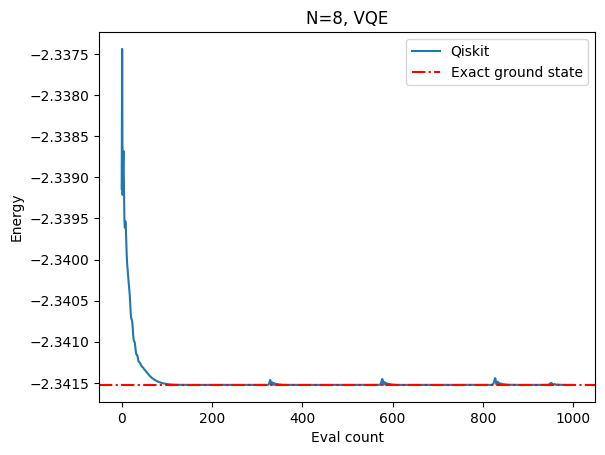

In [48]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

#pylab.rcParams["figure.figsize"] = (12, 8)

#steps_np = np.asarray(steps)
#counts_np = np.asarray(counts)
#values_np = np.asarray(values)

#pylab.plot(range(maxiter),expectations[:maxiter], label=f"Qiskit VQE state")
pylab.plot(range(len(expectations)),expectations, label=f"Qiskit")
plt.axhline(y=E[0], color='r', linestyle='-.', label=f"Exact ground state")

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
#pylab.title("Energy convergence for each computed state")
plt.title('N=8, VQE')
pylab.legend(loc="upper right")

## Stochastic Gradient Descent

In [49]:
import torch
import numpy as np
import time
from qiskit_algorithms.gradients import ParamShiftEstimatorGradient
from qiskit.primitives import Estimator  # EstimatorV1 (deprecated but currently compatible)
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Set initial parameters
params_torch = torch.tensor(x0, dtype=torch.float64, requires_grad=True)

# Initialize Qiskit Estimator (V1) and gradient calculator
estimator = Estimator()
gradient = ParamShiftEstimatorGradient(estimator)

# Adam optimizer from PyTorch
optimizer = torch.optim.SGD([params_torch], lr=0.01)

maxiter = 1000
expectations = []

# Prepare transpiled circuit and observable (once, outside the loop)
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(ansatz)
isa_observable = Ham_qiskit.apply_layout(isa_circuit.layout)

start_time = time.time()
for i in range(maxiter):
    optimizer.zero_grad()

    # Current parameters to numpy for Qiskit
    param_np = params_torch.detach().numpy()

    # Evaluate the expectation value using estimator
    job = estimator.run([isa_circuit], [isa_observable], [param_np])
    result = job.result()
    expval = result.values[0]

    # Compute gradients using Qiskit's parameter shift rule
    grad_job = gradient.run([isa_circuit], [isa_observable], [param_np])
    grad_result = grad_job.result().gradients[0]

    # Set computed gradients to PyTorch tensor
    params_torch.grad = torch.tensor(grad_result, dtype=torch.float64)

    # Update parameters
    optimizer.step()

    # Save and print expectation value
    expectations.append(expval)

    if (i + 1) % 50 == 0:
        print(f'Iteration {i+1}/{maxiter}, Cost: {expval}')

print("--- Adam optimizer running time: %s seconds ---\n" % (time.time() - start_time))

# Optimized parameters and final minimized cost
optimized_theta = params_torch.detach().numpy()
print("Optimized Parameters (theta):", optimized_theta)
print("Final minimized cost:", expectations[-1])

/tmp/ipykernel_629761/1327865060.py:12: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


Iteration 50/1000, Cost: -2.339187567928822
Iteration 100/1000, Cost: -2.339228846850734
Iteration 150/1000, Cost: -2.339268709385922
Iteration 200/1000, Cost: -2.3393077580952437
Iteration 250/1000, Cost: -2.3393461392037973
Iteration 300/1000, Cost: -2.339383913834575
Iteration 350/1000, Cost: -2.3394211150140842
Iteration 400/1000, Cost: -2.339457763838995
Iteration 450/1000, Cost: -2.339493875519145
Iteration 500/1000, Cost: -2.3395294619933154
Iteration 550/1000, Cost: -2.33956453318419
Iteration 600/1000, Cost: -2.3395990976504866
Iteration 650/1000, Cost: -2.3396331629499585
Iteration 700/1000, Cost: -2.339666735855729
Iteration 750/1000, Cost: -2.339699822494981
Iteration 800/1000, Cost: -2.3397324284451555
Iteration 850/1000, Cost: -2.3397645588059444
Iteration 900/1000, Cost: -2.339796218256902
Iteration 950/1000, Cost: -2.3398274111060298
Iteration 1000/1000, Cost: -2.339858141332332
--- Adam optimizer running time: 150.05889773368835 seconds ---

Optimized Parameters (theta

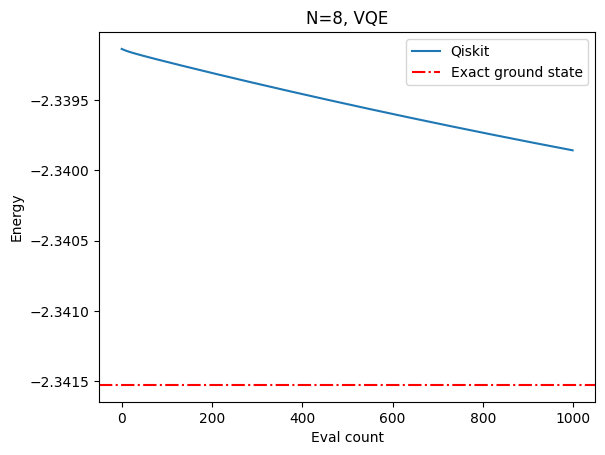

In [50]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

#pylab.rcParams["figure.figsize"] = (12, 8)

#steps_np = np.asarray(steps)
#counts_np = np.asarray(counts)
#values_np = np.asarray(values)

#pylab.plot(range(maxiter),expectations[:maxiter], label=f"Qiskit VQE state")
pylab.plot(range(len(expectations)),expectations, label=f"Qiskit")
plt.axhline(y=E[0], color='r', linestyle='-.', label=f"Exact ground state")

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
#pylab.title("Energy convergence for each computed state")
plt.title('N=8, VQE')
pylab.legend(loc="upper right")

## RMSprop

In [51]:
import torch
import numpy as np
import time
from qiskit_algorithms.gradients import ParamShiftEstimatorGradient
from qiskit.primitives import Estimator  # EstimatorV1 (deprecated but currently compatible)
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Set initial parameters
params_torch = torch.tensor(x0, dtype=torch.float64, requires_grad=True)

# Initialize Qiskit Estimator (V1) and gradient calculator
estimator = Estimator()
gradient = ParamShiftEstimatorGradient(estimator)

# Adam optimizer from PyTorch
optimizer = torch.optim.RMSprop([params_torch], lr=0.01)

maxiter = 1000
expectations = []

# Prepare transpiled circuit and observable (once, outside the loop)
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(ansatz)
isa_observable = Ham_qiskit.apply_layout(isa_circuit.layout)

start_time = time.time()
for i in range(maxiter):
    optimizer.zero_grad()

    # Current parameters to numpy for Qiskit
    param_np = params_torch.detach().numpy()

    # Evaluate the expectation value using estimator
    job = estimator.run([isa_circuit], [isa_observable], [param_np])
    result = job.result()
    expval = result.values[0]

    # Compute gradients using Qiskit's parameter shift rule
    grad_job = gradient.run([isa_circuit], [isa_observable], [param_np])
    grad_result = grad_job.result().gradients[0]

    # Set computed gradients to PyTorch tensor
    params_torch.grad = torch.tensor(grad_result, dtype=torch.float64)

    # Update parameters
    optimizer.step()

    # Save and print expectation value
    expectations.append(expval)

    if (i + 1) % 50 == 0:
        print(f'Iteration {i+1}/{maxiter}, Cost: {expval}')

print("--- Adam optimizer running time: %s seconds ---\n" % (time.time() - start_time))

# Optimized parameters and final minimized cost
optimized_theta = params_torch.detach().numpy()
print("Optimized Parameters (theta):", optimized_theta)
print("Final minimized cost:", expectations[-1])

/tmp/ipykernel_629761/2013278160.py:12: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


Iteration 50/1000, Cost: -2.341230525700128
Iteration 100/1000, Cost: -2.341028556379886
Iteration 150/1000, Cost: -2.3406630318694326
Iteration 200/1000, Cost: -2.340782511799822
Iteration 250/1000, Cost: -2.3403226057709157
Iteration 300/1000, Cost: -2.3394981229297214
Iteration 350/1000, Cost: -2.3395941626278267
Iteration 400/1000, Cost: -2.338829437121377
Iteration 450/1000, Cost: -2.3398688775926115
Iteration 500/1000, Cost: -2.3413972163879104
Iteration 550/1000, Cost: -2.3410252959582984
Iteration 600/1000, Cost: -2.34099643805971
Iteration 650/1000, Cost: -2.34100871292634
Iteration 700/1000, Cost: -2.3412720274796692
Iteration 750/1000, Cost: -2.34088128560678
Iteration 800/1000, Cost: -2.3403999726210136
Iteration 850/1000, Cost: -2.3398347623673343
Iteration 900/1000, Cost: -2.3397861130286275
Iteration 950/1000, Cost: -2.339986589203636
Iteration 1000/1000, Cost: -2.340146761743595
--- Adam optimizer running time: 152.14836931228638 seconds ---

Optimized Parameters (theta

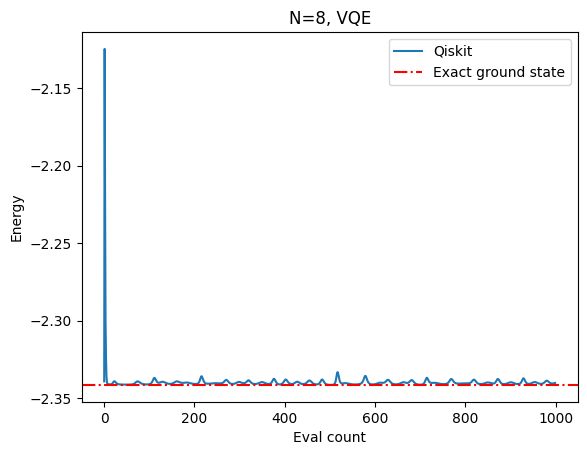

In [52]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

#pylab.rcParams["figure.figsize"] = (12, 8)

#steps_np = np.asarray(steps)
#counts_np = np.asarray(counts)
#values_np = np.asarray(values)

#pylab.plot(range(maxiter),expectations[:maxiter], label=f"Qiskit VQE state")
pylab.plot(range(len(expectations)),expectations, label=f"Qiskit")
plt.axhline(y=E[0], color='r', linestyle='-.', label=f"Exact ground state")

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
#pylab.title("Energy convergence for each computed state")
plt.title('N=8, VQE')
pylab.legend(loc="upper right")

# VQD

In [53]:
def makeAnsatzFull(N, L, param): 
    qr = QuantumRegister(N, 'q')
    qc = QuantumCircuit(qr)  
    
    for i in range(L):
        for k in range(N):
            qc.ry(param[k+N*i], qr[k])
        
        for j in range(N-1):
            for k in range(j+1,N):
                qc.cx(qr[j], qr[k])

    for k in range(N):
        qc.ry(param[k+N*L], qr[k])    
    
    return qc

In [54]:
def makeAnsatzLinear(N, L, param): 
    qr = QuantumRegister(N, 'q')
    qc = QuantumCircuit(qr)  
    
    for i in range(L):
        for k in range(N):
            qc.ry(param[k+N*i], qr[k])
        
        for j in range(N-1):
            qc.cx(qr[j], qr[j+1])
                
    for k in range(N):
        qc.ry(param[k+N*L], qr[k])
    
    return qc

In [55]:
simulator = AerSimulator(method='statevector')

In [56]:
L = 4
#simulator = BasicAer.get_backend("statevector_simulator")

def costFunctionVQD(param, ansatz, Ham, k, betas, statevectors, params, expectations):
    estimator = Estimator()
    #service = QiskitRuntimeService()
    params.append(param)
    
    #job = estimator.run(ansatz, Ham, param)
    job = estimator_v1.run([ansatz], [Ham], [param])
    result = job.result()
    exp = result.values[0]
    
    ansatz_time = 0.0
    execute_time = 0.0
    dot_time = 0.0
    
    start = time.time()
    qc = makeAnsatzFull(N, L, param)
    qc.save_statevector()
    #print('makeAnsatz() time: ', time.time() - start)
    ansatz_time += time.time() - start

    start = time.time()
    #job = execute(qc, backend = simulator)
    job = simulator.run(qc)
    result = job.result()
    psi = result.get_statevector(qc)
    #print('execute() time: ', time.time() - start)
    execute_time += time.time() - start
    
    for i in range(k):
        start = time.time()
        z = np.dot(np.conjugate(np.transpose(psi)), statevectors[i])
        norm_sq = np.conjugate(z) * z
        exp += betas[i] * norm_sq
        #print('inner prodction time: ', time.time() - start)
        dot_time += time.time() - start
        
    #print('ansatz_time: ', ansatz_time)
    #print('execute_time: ', execute_time)
    #print('dot_time: ', dot_time)    
    expectations.append(exp)
    
    return exp

In [57]:
# betas

In [58]:
estimator_v1

In [59]:
k = 2
N = 4
L = 4

In [60]:
import warnings
warnings.filterwarnings('ignore')

## COBYLA

In [61]:
params_list = []
expectations_list = []
final_exp = []
final_param = []
psi_list = []
maxiter = 5000
betas =[]
bound = Bounds(lb = -2 * np.pi, ub = 2 * np.pi)
total_time = time.time()

for i in range(k+1):
    params_list.append([])
    expectations_list.append([])

start_time = time.time()
result = minimize(costFunctionE1, x0, (ansatz, Ham_qiskit, params_list[0], expectations_list[0]), method='COBYLA', options={'maxiter': maxiter}, bounds=bound) 
print("--- Ground State computing time: %s seconds ---\n" % (time.time() - start_time))
final_param.append(result.x)
final_exp.append(result.fun)

for i in range(k):
    betas.append(33)
    qc = makeAnsatzFull(N, L, final_param[i])
    qc.save_statevector()
    #job = execute(qc, backend = simulator)
    job = simulator.run(qc)
    result = job.result()
    psi_list.append(result.get_statevector(qc))
    
    start_time = time.time()
    result = minimize(costFunctionVQD, x0, (ansatz, Ham_qiskit, i+1, betas, psi_list, params_list[i+1], expectations_list[i+1]), method='SLSQP', options={'maxiter': maxiter}, bounds=bound)
    print(f"--- {i+1}-th Excited State  time: %s seconds ---\n" % (time.time() - start_time))

    final_param.append(result.x)
    final_exp.append(result.fun)

print('\nTotal running time: ', time.time() - total_time)

--- Ground State computing time: 22.96014976501465 seconds ---

--- 1-th Excited State  time: 17.41831660270691 seconds ---

--- 2-th Excited State  time: 11.737741708755493 seconds ---


Total running time:  52.12570405006409


In [62]:
expectations_list[0][-1]

np.float64(-2.3414432789840296)

In [63]:
expectations_list[1][-1]

np.complex128(-2.341503646421955+0j)

In [64]:
expectations_list[2][-1]

np.complex128(-2.3399342676218735+0j)

In [65]:
E

array([-2.34152542, -1.40211303, -0.6755705 ,  0.33600419,  0.5       ])

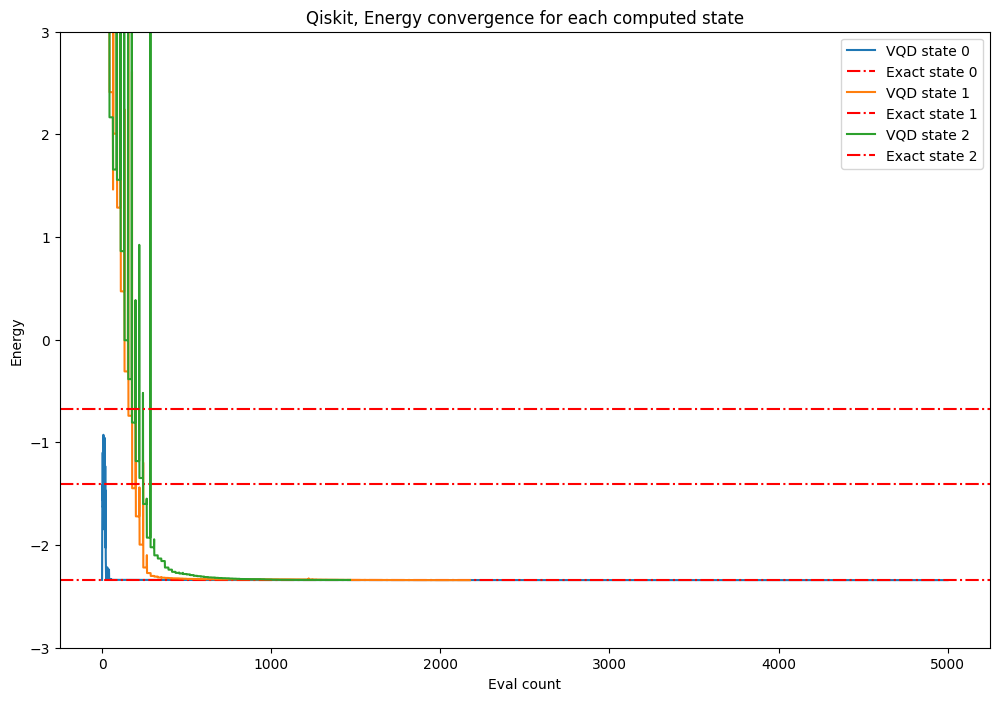

In [66]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

pylab.rcParams["figure.figsize"] = (12, 8)

#steps_np = np.asarray(steps)
#counts_np = np.asarray(counts)
#values_np = np.asarray(values)

for i in range(1,k+2):
    #_counts = counts_np[np.where(steps_np == i)]
    #_values = values_np[np.where(steps_np == i)]
    pylab.plot(range(len(expectations_list[i-1])),expectations_list[i-1][:maxiter], label=f"VQD state {i-1}")
    plt.axhline(y=E[i-1], color='r', linestyle='-.', label=f"Exact state {i-1}")
    #plt.axhline(y=charge_less_E[i-1], color='b', linestyle='--', label=f"Charge Zero Exact state {i-1}")

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
plt.ylim((-3,3))
pylab.title("Qiskit, Energy convergence for each computed state")
pylab.legend(loc="upper right")

#plt.savefig("VQD_Chargeless.pdf")

## Adam

## Stochastic Gradient Descent

## RMSprop